In [2]:
from random import randint
#import seaborn as sns
import numpy as np

In [3]:
N = 100000
v_first = np.zeros(N)
v_min = np.zeros(N)
v_rand = np.zeros(N)

In [5]:
for i in range(N):
    n,p = 10, 0.5
    flips = np.random.binomial(n,p,1000)
    
    first_coin = 0
    min_coin = np.argmin(flips)
    rand_coin = np.random.randint(0,1000)
    
    v_first[i] = flips[first_coin]
    v_min[i] = flips[min_coin]
    v_rand[i] = flips[rand_coin]

In [7]:
print (np.average(v_min))

0.37587


In [36]:
# HW 5,6,7
# generate 2 points
point1 = np.random.uniform(low=-1,high=1,size=2)
point2 = np.random.randint(low=-1, high=1, size=2)
print(point1, point2)
# create a line
target_slope = (point2[1]-point1[1])/(point2[0]-point1[0])
target_yint = point2[1] - target_slope * point2[0]
print(target_slope, target_yint)
# now we generate N points
N = 100
xcoord = np.random.uniform(low=-1,high=1,size=N*2)
X = np.array([[ xcoord]])
X = X.reshape((100,2))
print(X.shape)
print(X[0:5])


[-0.43574404  0.29105205] [ 0 -1]
-2.9628679462084815 -1.0
(100, 2)
[[ 0.97521273 -0.12998187]
 [ 0.62199987 -0.76527356]
 [-0.98649724 -0.87924321]
 [-0.28199541  0.63039078]
 [-0.82873827  0.27970558]]


In [46]:
# now determine y
y = (X[:,1] > (X[:,0] * target_slope + target_yint)) * 1
y[y==0] = -1
#y[y==True] = 1
print(y[0:10])

[ 1  1 -1  1 -1  1  1 -1 -1  1]


In [49]:
# calculate w
tmp = np.linalg.inv(X.T @ X)
tmp = tmp @ X.T
w = tmp @ y
print(w)

[1.24955389 0.35421598]


In [51]:
%matplotlib inline
import matplotlib.pyplot as plt

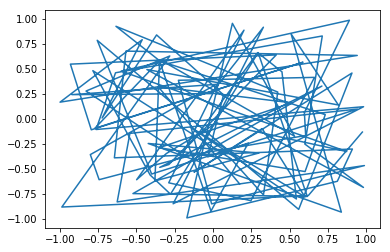

In [53]:
plt.plot(X[:,0], X[:,1])